# Descarga y Exploracion del Corpus

In [18]:
import os
import json
import gzip
import pandas as pd
from urllib.request import urlopen

In [19]:
!wget https://datarepo.eng.ucsd.edu/mcauley_group/data/amazon_v2/categoryFilesSmall/Video_Games_5.json.gz

--2024-03-30 23:19:32--  https://datarepo.eng.ucsd.edu/mcauley_group/data/amazon_v2/categoryFilesSmall/Video_Games_5.json.gz
Resolving datarepo.eng.ucsd.edu (datarepo.eng.ucsd.edu)... 132.239.8.30
Connecting to datarepo.eng.ucsd.edu (datarepo.eng.ucsd.edu)|132.239.8.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 154050105 (147M) [application/x-gzip]
Saving to: ‘Video_Games_5.json.gz.1’

Video_Games_5.json. 100%[===================>] 146.91M  97.1MB/s    in 1.5s    

2024-03-30 23:19:34 (97.1 MB/s) - ‘Video_Games_5.json.gz.1’ saved [154050105/154050105]



In [20]:
data = []
file_path = 'Video_Games_5.json.gz'

max_products = 1000

# Abre el archivo comprimido y lee las líneas
with gzip.open(file_path, 'rt', encoding='utf-8') as f:
    for i, l in enumerate(f):
        if i >= max_products:  # Solo lee hasta max_products
            break
        # Agrega el producto a la lista de datos
        data.append(json.loads(l.strip()))

# Total de productos descargados
total_productos = pd.DataFrame({'Total de productos descargados': [len(data)]})
print(f'Total de productos descargados: {len(data)}')

producto_muestra = pd.DataFrame([data[0]])
print('Producto de Muestra:')
for key, value in data[0].items():
    print(f'{key}: {value}')

Total de productos descargados: 1000
Producto de Muestra:
overall: 5.0
verified: True
reviewTime: 10 17, 2015
reviewerID: A1HP7NVNPFMA4N
asin: 0700026657
reviewerName: Ambrosia075
reviewText: This game is a bit hard to get the hang of, but when you do it's great.
summary: but when you do it's great.
unixReviewTime: 1445040000


In [21]:
file_path = 'Video_Games_5.json.gz'
data = []

# Abrimos el archivo .json.gz y cargamos los datos
with gzip.open(file_path, 'r') as f:
    for line in f:
        # La siguiente línea decodifica cada línea del archivo de bytes a string
        # y luego carga el string como un diccionario de Python
        data.append(json.loads(line.decode('utf-8')))

# Convierte la lista de datos en un DataFrame de Pandas
df = pd.DataFrame(data)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497577 entries, 0 to 497576
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   overall         497577 non-null  float64
 1   verified        497577 non-null  bool   
 2   reviewTime      497577 non-null  object 
 3   reviewerID      497577 non-null  object 
 4   asin            497577 non-null  object 
 5   reviewerName    497501 non-null  object 
 6   reviewText      497419 non-null  object 
 7   summary         497468 non-null  object 
 8   unixReviewTime  497577 non-null  int64  
 9   vote            107793 non-null  object 
 10  style           289237 non-null  object 
 11  image           3634 non-null    object 
dtypes: bool(1), float64(1), int64(1), object(9)
memory usage: 42.2+ MB


In [23]:
df.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,5.0,True,"10 17, 2015",A1HP7NVNPFMA4N,0700026657,Ambrosia075,"This game is a bit hard to get the hang of, bu...",but when you do it's great.,1445040000,NaN,NaN,NaN
1,4.0,False,"07 27, 2015",A1JGAP0185YJI6,0700026657,travis,I played it a while but it was alright. The st...,"But in spite of that it was fun, I liked it",1437955200,NaN,NaN,NaN
2,3.0,True,"02 23, 2015",A1YJWEXHQBWK2B,0700026657,Vincent G. Mezera,ok game.,Three Stars,1424649600,NaN,NaN,NaN
3,2.0,True,"02 20, 2015",A2204E1TH211HT,0700026657,Grandma KR,"found the game a bit too complicated, not what...",Two Stars,1424390400,NaN,NaN,NaN
4,5.0,True,"12 25, 2014",A2RF5B5H74JLPE,0700026657,jon,"great game, I love it and have played it since...",love this game,1419465600,NaN,NaN,NaN


In [24]:
for col in df.columns:
    if df[col].dtype == "object":
        print(f"Column '{col}' has unhashable data type.")

Column 'reviewTime' has unhashable data type.
Column 'reviewerID' has unhashable data type.
Column 'asin' has unhashable data type.
Column 'reviewerName' has unhashable data type.
Column 'reviewText' has unhashable data type.
Column 'summary' has unhashable data type.
Column 'vote' has unhashable data type.
Column 'style' has unhashable data type.
Column 'image' has unhashable data type.


In [25]:
# Convierte las columnas que contienen diccionarios o listas a strings
# Esto es útil para columnas como 'style' que podrían contener diccionarios.
for column in ['style', 'image']:
    df[column] = df[column].apply(lambda x: str(x) if isinstance(x, dict) or isinstance(x, list) else x)

# Se asegura de que todas las demás columnas mencionadas sean tipo string, si es que se esperan así.
for column in ['reviewTime', 'reviewerID', 'asin', 'reviewerName', 'reviewText', 'summary', 'vote']:
    df[column] = df[column].astype(str)

In [26]:
# Realiza las operaciones como eliminar duplicados sin problemas
df.drop_duplicates(inplace=True)

In [27]:
# Verifica cuántos valores faltantes hay por columna
print(df.isnull().sum())

# Elimina filas donde una columna específica, como 'reviewText', es NaN (ajusta según tus necesidades)
df.dropna(subset=['reviewText'], inplace=True)


overall                0
verified               0
reviewTime             0
reviewerID             0
asin                   0
reviewerName           0
reviewText             0
summary                0
unixReviewTime         0
vote                   0
style             199186
image             470718
dtype: int64


In [28]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 474290 entries, 0 to 497576
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   overall         474290 non-null  float64
 1   verified        474290 non-null  bool   
 2   reviewTime      474290 non-null  object 
 3   reviewerID      474290 non-null  object 
 4   asin            474290 non-null  object 
 5   reviewerName    474290 non-null  object 
 6   reviewText      474290 non-null  object 
 7   summary         474290 non-null  object 
 8   unixReviewTime  474290 non-null  int64  
 9   vote            474290 non-null  object 
 10  style           275104 non-null  object 
 11  image           3572 non-null    object 
dtypes: bool(1), float64(1), int64(1), object(9)
memory usage: 43.9+ MB
None


In [29]:
print(df.describe())

             overall  unixReviewTime
count  474290.000000    4.742900e+05
mean        4.226615    1.369974e+09
std         1.182494    1.235451e+08
min         1.000000    9.398592e+08
25%         4.000000    1.324944e+09
50%         5.000000    1.412726e+09
75%         5.000000    1.453680e+09
max         5.000000    1.538438e+09


<Axes: >

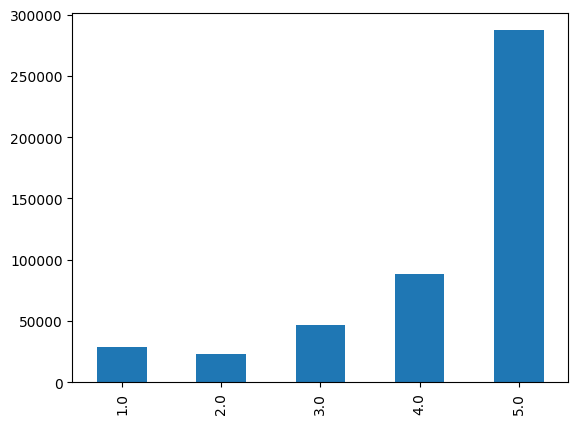

In [30]:
df['overall'].value_counts().sort_index().plot(kind='bar')

In [31]:
print(df['reviewerID'].value_counts().head())

A3V6Z4RCDGRC44    783
AJKWF4W7QD4NS     692
A3W4D8XOGLWUN5    502
A2TCG2HV1VJP6V    441
A2QHS1ZCIQOL7E    428
Name: reviewerID, dtype: int64


In [32]:
import pandas as pd
from collections import Counter
import re

# Combina todo el texto de las reseñas y asegura que todo sea string
text = ' '.join(df['reviewText'].astype(str).dropna())
# Encuentra todas las palabras (asumiendo que 'words' es una lista de palabras en minúsculas)
words = re.findall(r'\w+', text.lower())
# Crea un contador con la frecuencia de cada palabra

word_counts = Counter(words)
# Aqui convertimos las 50 palabras más comunes en un DataFrame de Pandas para una visualización más ordenada
most_common_words = pd.DataFrame(word_counts.most_common(50), columns=['Word', 'Count'])

# Muestra la tabla de las 50 palabras más comunes
print(most_common_words)



     Word    Count
0     the  3164106
1     and  1601891
2      to  1500890
3       a  1465652
4       i  1262846
5      it  1170618
6      of  1106651
7     you  1076752
8      is  1020251
9    game   956854
10   this   776295
11     in   688251
12   that   641731
13    for   588638
14    but   467220
15   with   448393
16    are   446112
17      s   432015
18     on   414786
19      t   394857
20   have   388163
21     as   380792
22    not   322287
23    can   306730
24    was   292985
25   like   273347
26     be   270084
27     if   264962
28     my   262989
29     so   255906
30    all   247396
31   your   247035
32    one   242771
33     or   238920
34  games   234486
35  there   230722
36   just   220041
37   they   216485
38    get   198530
39   more   196369
40     at   194232
41   play   192984
42  great   186501
43   from   184057
44   good   178726
45   will   171900
46    out   171595
47     up   171317
48   very   168074
49   some   161509


In [33]:
!pip install spacy
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 38.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import spacy

# Cargar el modelo de spaCy para el idioma inglés
nlp = spacy.load('en_core_web_sm')

# Es la columna que contiene el texto de las reseñas
# Y aquí procesamos las reseñas y lematizamos cada token.
df['lemmatized'] = df['reviewText'].astype(str).apply(lambda text: ' '.join([token.lemma_ for token in nlp(text)]))

# Ahora puedes revisar el resultado
print(df[['reviewText', 'lemmatized']].head())


In [ ]:
import re
from collections import Counter
from nltk.util import ngrams
import pandas as pd

# Configuración para NLTK
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

# Concatena todo el texto de las reseñas en una única cadena de texto
all_text = ' '.join(df['reviewText'].dropna()).lower()  # Se convierte todo a minúsculas para la consistencia

# Tokeniza el texto en palabras
words = word_tokenize(all_text)

# Define el número de n para tus n-grams
n = 3  # Cambia esto a 3 para trigrams, 4 para four-grams, etc.

# Genera los n-grams de todo el texto
all_ngrams = ngrams(words, n)

# Cuenta la frecuencia de cada n-gram
ngram_freq = Counter(all_ngrams)

# Selecciona los 10 n-grams más comunes
most_common_ngrams = ngram_freq.most_common(10)

# Convierte los n-grams más comunes en un DataFrame para una visualización más ordenada
most_common_ngrams_df = pd.DataFrame(most_common_ngrams, columns=['N-gram', 'Count'])

# Muestra la tabla de n-grams más comunes
print(most_common_ngrams_df)


In [ ]:
# Instala la biblioteca wordcloud si aún no lo has hecho
!pip install wordcloud

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
import nltk

# Configuración para NLTK
nltk.download('punkt')

# Asumiendo que 'all_text' contiene todo el texto de tus reseñas
words = word_tokenize(all_text.lower())  # Convertir a minúsculas para consistencia

# Calcula la frecuencia de cada palabra
word_freq = Counter(words)

# Selecciona las 50 palabras más frecuentes
top_50_words = dict(word_freq.most_common(50))

# Crea una nube de palabras usando solo las 50 palabras más frecuentes
wordcloud = WordCloud(width=800, height=800, background_color='white').generate_from_frequencies(top_50_words)

# Mostrar la nube de palabras
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()



In [ ]:
import gensim
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Palabras seleccionadas para la visualización
selected_words = ['game', 'controller', 'graphics', 'sound', 'level']

# Obtener las palabras más similares y sus vectores
words = []
word_vectors = []

for word in selected_words:
    # Añadir la palabra misma
    words.append(word)
    word_vectors.append(word2vec_model.wv[word])
    # Añadir las top 10 palabras más similares
    similar_words = word2vec_model.wv.most_similar(word, topn=10)
    for similar_word, _ in similar_words:
        words.append(similar_word)
        word_vectors.append(word2vec_model.wv[similar_word])

# Reducir dimensiones a 2D usando t-SNE
tsne = TSNE(n_components=2, random_state=0)
word_vectors_2d = tsne.fit_transform(word_vectors)

# Crear una visualización de las palabras y sus vectores en 2D
plt.figure(figsize=(16, 16))
for point, word in zip(word_vectors_2d, words):
    plt.scatter(point[0], point[1], c='red' if word in selected_words else 'blue')
    plt.text(point[0] + 0.05, point[1] + 0.05, word, fontsize=12)
plt.show()


# 2. Etapa de preprocesado de texto

In [ ]:
import re
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize
from string import punctuation

# Carga de stopwords en inglés y eliminación de las especificadas
stop_words = set(stopwords.words('english')) - {'the', 'and', 'to', 'a', 'i', 'it', 'of', 'you', 'is', 'are', 'on', 't', 'as', 'be', 'if', 'my', 'so', 'all'}

# Inicializar el Stemmer en inglés
stemmer = SnowballStemmer('english')

def preprocesar(texto):
    # Convierte a minúsculas
    texto = texto.lower()
    # Elimina caracteres especiales y números
    texto = re.sub(r'\W|\d', ' ', texto)
    # Tokenización
    tokens = word_tokenize(texto)
    # Eliminación de stopwords personalizada y puntuación + Stemming
    tokens = [stemmer.stem(word) for word in tokens if word not in stop_words and word not in punctuation]
    # Reconstruye el texto procesado
    texto_procesado = ' '.join(tokens)
    return texto_procesado

# 3. Etapa de entrenamiento y testeo de un modelo de análisis de sentimiento

### Preparacion de Datos

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

X_preprocesados = df['reviewText'].values
y_etiquetas = df['sentiment'].map({'negative': 0, 'positive': 1}).values

# Inicialización del CountVectorizer
vectorizer = CountVectorizer()

# Ajuste y transformación de los datos
X_vectorizados = vectorizer.fit_transform(X_preprocesados)

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_vectorizados, y_etiquetas, test_size=0.2, random_state=42)


### Modelo de Clasificacion (Regresion Logistica)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Inicializar y entrenar el modelo de Regresión Logística
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

# Predicciones y evaluación
y_pred_log_reg = log_reg.predict(X_test)
print("Regresión Logística - Reporte de Clasificación:\n", classification_report(y_test, y_pred_log_reg))


### Arbol de Desicion.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Inicializar y entrenar el modelo de Árbol de Decisión
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

# Predicciones y evaluación
y_pred_tree = tree.predict(X_test)
print("Árbol de Decisión - Reporte de Clasificación:\n", classification_report(y_test, y_pred_tree))


# 4. Reporte de métricas y conclusiones

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
# Calcula la matriz de confusión
matriz_conf = confusion_matrix(y_test, y_pred)

# Visualización de la matriz de confusión con Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_conf, annot=True, fmt="d", cmap="Blues", xticklabels=["Negativo", "Positivo"], yticklabels=["Negativo", "Positivo"])
plt.ylabel('Etiqueta Verdadera')
plt.xlabel('Etiqueta Predicha')
plt.title("Matriz de Confusión")
plt.show()


## Análisis de las Métricas

**Precisión:** Observa la precisión para la clase positiva en el reporte de clasificación. Si es alta, significa que tu modelo es muy bueno prediciendo las instancias positivas correctamente entre todas las instancias que predijo como positivas.

**Recall de cada clase:** El recall te indica qué tan bueno es el modelo identificando todas las instancias positivas (y negativas, para ese caso). Un recall alto para la clase positiva significa que el modelo es bueno capturando la mayoría de las instancias positivas.

**F1-Score:** Este es un buen indicador de la precisión y el recall balanceados. Si tu modelo tiene un f1-score alto para ambas clases, está haciendo un buen trabajo balanceando entre identificar correctamente las instancias de cada clase y minimizar las falsas alarmas.

**Matriz de Confusión:** Esta visualización te permite ver no solo los aciertos (verdaderos positivos y verdaderos negativos) sino también los errores (falsos positivos y falsos negativos) de tu modelo. Los verdaderos positivos y verdaderos negativos están en la diagonal de la matriz, mientras que los falsos positivos y falsos negativos se encuentran fuera de esta. Un modelo ideal tiene números altos en la diagonal y bajos fuera de ella.

# Conclusion

 Basado en las métricas evaluadas, el modelo de análisis de sentimientos muestra una sólida precisión general, lo que indica una capacidad competente para clasificar correctamente las reseñas en positivas y negativas. Sin embargo, el recall para la clase positiva sugiere que el modelo puede mejorar en la identificación de todas las instancias positivas. Esto podría abordarse considerando un preprocesamiento más refinado de los datos o explorando modelos más complejos como redes neuronales. Las limitaciones actuales incluyen una tendencia a sobreajustar en el conjunto de datos de entrenamiento, lo que sugiere la necesidad de una mayor regularización o la incorporación de más datos de entrenamiento diversificados. Las futuras iteraciones del proyecto se beneficiarían de experimentar con técnicas avanzadas de vectorización y balanceo de clases.